In [29]:
from LinearRegressionAnalytic import LinearRegressionAnalytic
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
data = pd.read_csv("biomechanics_dataset_v1.csv") 

np.random.seed(1)
X = data.iloc[:,1:60]
y = data.iloc[:, 60]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = .2)


### Source code 
https://github.com/CeceZiegler1/ML_Final_Proj/blob/main/LinearRegressionAnalytic.py

Below, we fit our model on the x_train and and y_train datasets, and then print out the training and validation scores. This model is fitted on all 60 features in the dataset. We can see from the scores, that it is not performing great, as a validation score below 50% indicates we could do better by just randomly selecting. We are going to perform a recursive feature elimination that we also implemented in our source code to see if we can find the optimal number of features to use to obtain the best score.  

In [30]:
from LinearRegressionAnalytic import LinearRegressionAnalytic
from LinearRegressionAnalytic import rfe

#Seeing how the model performs without RFE

LR = LinearRegressionAnalytic()
LR.fit(x_train, y_train) # I used the analytical formula as my default fit method

print(f"Training score = {LR.score(x_train, y_train).round(4)}")
print(f"Validation score = {LR.score(x_test, y_test).round(4)}")

Training score = 0.5258
Validation score = 0.4605


Below, we create an array to store the score that is produced with each different number of features used in the model as selected by our RFE. We use a for loop to loop through each value from 1-60 and display the score at each iteration in a graph. What we see from the graph, is even with using fewer features, our score never gets above around 45%. The best scores come around 12-15 features and 55-60 feautres. Even still, the scores at these points aren't very good. Although we were hoping linear regression would perform well on our dataset, it doesn't appear to be the case. Because of this, we are going to implement a random forest tree to see if we can obtain a better validation score on our dataset. 

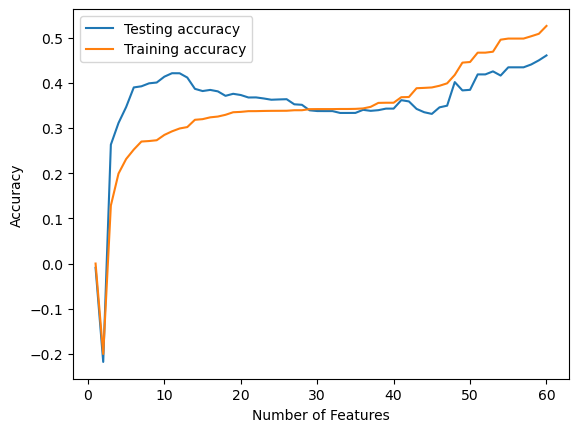

In [34]:

# compute the score for each value of k
val_scores = []
train_scores = []
for k in range(60):
    selected_features = rfe(x_train, y_train, k)
    feature_mask = np.zeros(x_train.shape[1], dtype=bool)
    #masking to include only the selected features
    feature_mask[selected_features] = True
    #subseting x train and test to include only selected feautres
    X_train_selected = x_train.loc[:, feature_mask]
    X_test_selected = x_test.loc[:, feature_mask]
    lr = LinearRegressionAnalytic()
    #fitting model on selected features
    lr.fit(X_train_selected, y_train)
    #appending score to score list
    val_scores.append(lr.score(X_test_selected, y_test))
    train_scores.append(lr.score(X_train_selected, y_train))

# plot the results
import matplotlib.pyplot as plt
plt.plot(range(1, 61), val_scores, label='Testing accuracy')
plt.plot(range(1, 61), train_scores, label='Training accuracy')
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
feat_select = rfe(x_train, y_train, 14)
feat_select

[33, 34, 3, 35, 37, 6, 39, 2, 43, 45, 14, 19, 23, 28]

Below, we will show the 13 most important features as obtained through our rfe.

In [8]:
data.iloc[:,[33, 34, 3, 35, 37, 6, 39, 43, 45, 14, 19, 23, 28]]

,max_rear_shoulder_x,max_rear_shoulder_y,range_lead_hip_z,max_rear_shoulder_z,max_torso_y,range_lead_shoulder_z,max_torso_pelvis_x,min_rfx,min_rfy,range_rear_shoulder_y,range_torso_pelvis_x,max_lead_hip_z,max_pelvis_y
0,550.0243,514.1198,778.1339,1188.6807,182.7302,867.6362,182.4743,-232.2776,-88.0097,689.2249,233.0842,384.3450,88.3858
1,638.6019,535.2822,960.4793,1278.5380,196.9712,1054.5098,236.0902,-189.7241,-106.2254,812.9988,306.7874,520.8627,106.4238
2,580.0406,472.9189,784.0413,1588.7207,248.4432,988.9415,222.8233,-124.4299,-84.5785,708.1030,313.2967,433.6955,82.5397
3,635.8561,484.2663,1036.2757,888.1270,166.9048,1472.7250,168.7606,-175.8547,-122.1629,732.5588,228.6738,489.4716,81.4764
4,566.9714,502.2202,1093.3019,1487.6143,191.2448,1130.6572,220.7400,-219.5387,-72.5831,699.1772,286.4758,597.7220,75.9968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,631.5529,488.3580,980.3030,1575.2948,165.8830,1150.6032,147.9856,-114.1301,-173.2356,804.6660,239.9022,354.5130,124.7927
633,571.2316,477.7701,748.3298,1604.9299,145.5400,1026.0944,188.9410,-113.4915,-157.5923,735.1128,276.8293,324.9995,137.1521
634,549.3600,407.3251,526.3367,1393.4961,128.0184,1029.3547,257.2261,-112.7565,-111.9854,584.3304,348.2130,207.2101,128.8111
635,623.2650,463.8467,1248.0062,1715.0544,136.8013,892.8699,177.4202,-122.3425,-161.2802,725.1355,266.6244,282.0038,157.1024


In [24]:
x_train = x_train.iloc[:,[33, 34, 3, 35, 37, 6, 39, 43, 45, 14, 19, 23, 28]]
x_test = x_test.iloc[:,[33, 34, 3, 35, 37, 6, 39, 43, 45, 14, 19, 23, 28]]

lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.386607442390802